In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # type: ignore

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# **Image Load and Preprocessing**

In [2]:
# Define the paths
train_dir = "D:\college-code-projects\Languanges\Python\datasets\dataset_70-20-10/train"
val_dir = "D:\college-code-projects\Languanges\Python\datasets\dataset_70-20-10/val"
test_dir = "D:\college-code-projects\Languanges\Python\datasets\dataset_70-20-10/test"

# Image data generator for training
train_datagen = ImageDataGenerator(rescale=1./224)
val_datagen = ImageDataGenerator(rescale=1./224)
test_datagen = ImageDataGenerator(rescale=1./224)

# Load images from the directories
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

Found 4480 images belonging to 2 classes.
Found 2560 images belonging to 2 classes.
Found 1280 images belonging to 2 classes.


# **Model Setup**

In [3]:
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Model Training**

In [4]:
# Compile the model
base_learning_rate = 0.0001
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,540,705 (36.39 MB)

 Trainable params: 9,540,705 (36.39 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
initial_epochs = 25
history = model.fit(train_data,
                    epochs=initial_epochs,
                    validation_data=val_data)

Epoch 1/25


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


70/70 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.6676 - loss: 0.6029 - val_accuracy: 0.7297 - val_loss: 0.5925
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.7852 - loss: 0.4834 - val_accuracy: 0.7746 - val_loss: 0.5222
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.8291 - loss: 0.4014 - val_accuracy: 0.7883 - val_loss: 0.4936
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.8433 - loss: 0.3763 - val_accuracy: 0.7949 - val_loss: 0.4725
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.8524 - loss: 0.3461 - val_accuracy: 0.7988 - val_loss: 0.4508
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.8652 - loss: 0.3067 - val_accuracy: 0.7895 - val_loss: 0.4734
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.8806 - loss: 0.2914 - val_accuracy: 0.8016 - val_loss: 0.4538
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.8890 - loss: 0.2553 - val_accuracy: 0.8168 - val_loss: 0.

# **Evaluation Metrics**

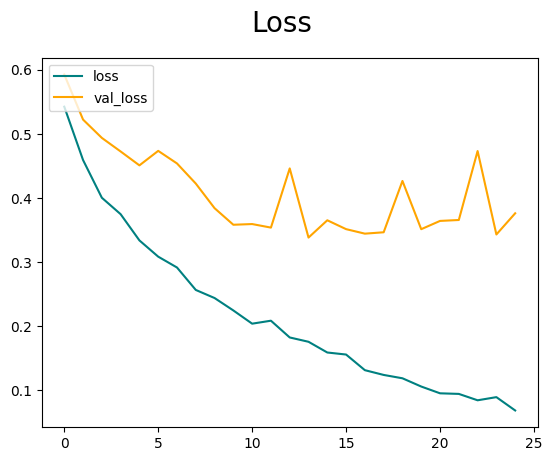

In [6]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(initial_epochs)

fig = plt.figure()
plt.plot(epochs_range, loss, color='teal', label='loss')
plt.plot(epochs_range, val_loss, color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

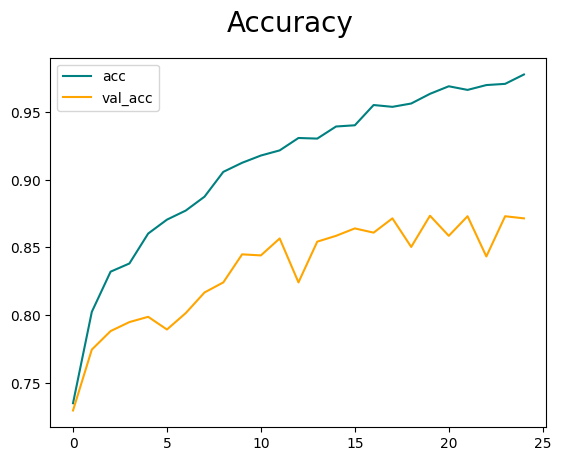

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

fig = plt.figure()
plt.plot(epochs_range, acc, color='teal', label='acc')
plt.plot(epochs_range, val_acc, color='orange', label='val_acc')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Test accuracy: 81.25%
              precision    recall  f1-score   support

     neutral       0.86      0.75      0.80        32
        porn       0.78      0.88      0.82        32

    accuracy                           0.81        64
   macro avg       0.82      0.81      0.81        64
weighted avg       0.82      0.81      0.81        64



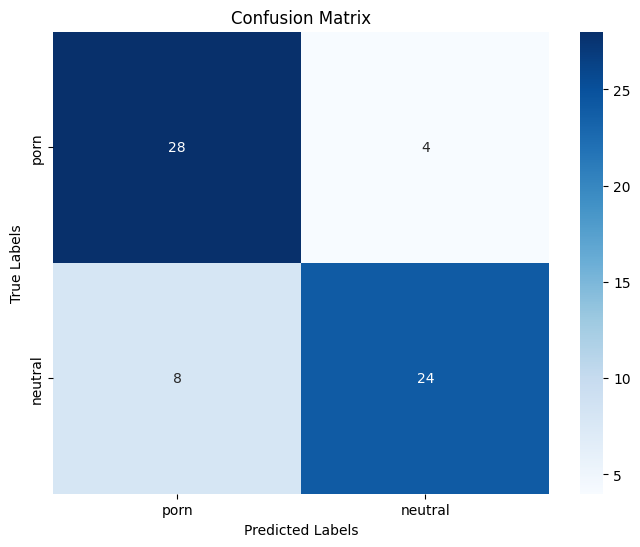

In [8]:
test_images, test_labels = next(test_data)
predictions = model.predict(test_images)

# Function to decode predictions
def decode_predictions(preds, threshold=0.5):
    return ['porn' if pred >= threshold else 'neutral' for pred in preds]
decoded_predictions = decode_predictions(predictions.flatten())  # Ensure predictions are flattened if necessary
decoded_labels = ['porn' if label == 1 else 'neutral' for label in test_labels]

# Test scores
accuracy = accuracy_score(decoded_labels, decoded_predictions)
report = classification_report(decoded_labels, decoded_predictions, target_names=['neutral', 'porn'])
print(f"Test accuracy: {accuracy*100:.2f}%")
print(report)

# Confusion matrix
cm = confusion_matrix(decoded_labels, decoded_predictions, labels=['porn', 'neutral'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['porn', 'neutral'], yticklabels=['porn', 'neutral'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **Test Prediction**

In [9]:
# correct_predictions = np.sum([(pred == 'porn' and label == 1) or (pred == 'neutral' and label == 0) for pred, label in zip(decoded_predictions, test_labels)])

# plt.figure(figsize=(25, 20))
# for i in range(len(test_images)):
#     plt.subplot(10, 10, i + 1)
#     plt.imshow(test_images[i])
#     score = predictions.flatten()[i]  # Get the prediction score for the current image
#     pred_label = decoded_predictions[i]
#     actual_label = 'porn' if test_labels[i] == 1 else 'neutral'
#     plt.title(f"Pred: {pred_label} ({score:.2f})\nActual: {actual_label}")
#     plt.axis('off')

# # Display the count of correct predictions
# plt.suptitle(f'Correct Predictions: {correct_predictions} out of {len(test_images)}', fontsize=20)
# plt.subplots_adjust(hspace=0.8)
# plt.show()

# **Transfer Learning**

In [10]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), 
                                               include_top = False, 
                                               weights = "imagenet")

In [11]:
base_model.trainable = False

In [12]:
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(1, activation="sigmoid")                                     
                                ])

In [13]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(train_data,
                    epochs=initial_epochs,
                    validation_data=val_data)

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.5226 - loss: 0.8078 - val_accuracy: 0.6645 - val_loss: 0.6054
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.6956 - loss: 0.5780 - val_accuracy: 0.7977 - val_loss: 0.4626
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.8048 - loss: 0.4519 - val_accuracy: 0.8609 - val_loss: 0.3763
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.8652 - loss: 0.3597 - val_accuracy: 0.8902 - val_loss: 0.3237
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 177s 3s/step - accuracy: 0.8874 - loss: 0.3118 - val_accuracy: 0.9090 - val_loss: 0.2847
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 180s 3s/step - accuracy: 0.9067 - loss: 0.2734 - val_accuracy: 0.9152 - val_loss: 0.2599
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 233s 3s/step - accuracy: 0.9151 - loss: 0.2556 - val_accuracy: 0.9242 - val_loss: 0.2379
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 183s 3s/step - accuracy: 0.9173 - loss: 0.2335 - val_accuracy: 0.9285 - v

# **Re-Evaluate**

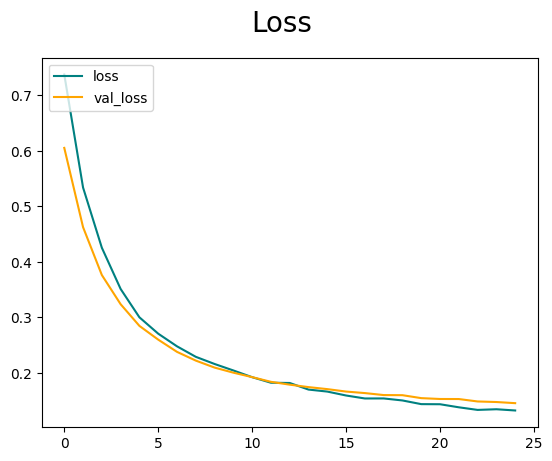

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(initial_epochs)

fig = plt.figure()
plt.plot(epochs_range, loss, color='teal', label='loss')
plt.plot(epochs_range, val_loss, color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

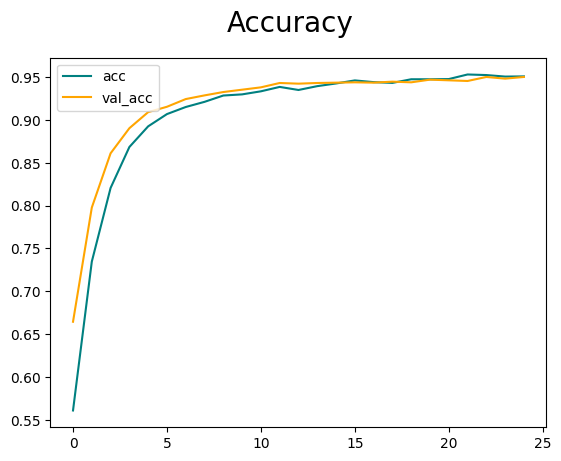

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

fig = plt.figure()
plt.plot(epochs_range, acc, color='teal', label='acc')
plt.plot(epochs_range, val_acc, color='orange', label='val_acc')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 603ms/step
Test accuracy: 95.31%
              precision    recall  f1-score   support

    non-porn       0.96      0.93      0.95        29
        porn       0.94      0.97      0.96        35

    accuracy                           0.95        64
   macro avg       0.95      0.95      0.95        64
weighted avg       0.95      0.95      0.95        64



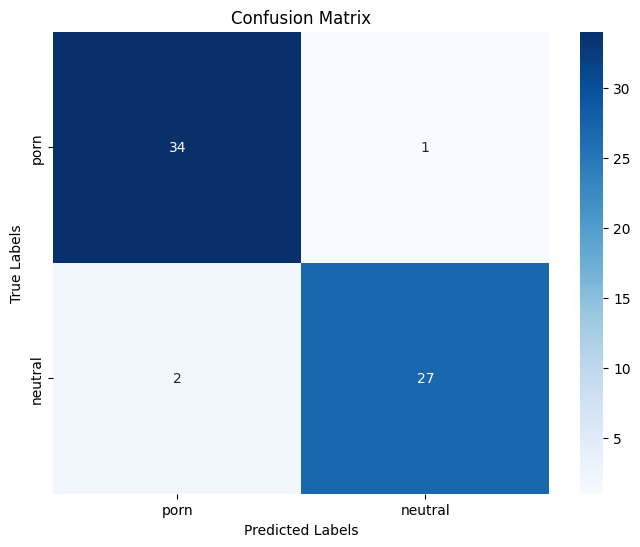

In [17]:
test_images, test_labels = next(test_data)
predictions = model.predict(test_images)

# Function to decode predictions
def decode_predictions(preds, threshold=0.5):
    return ['porn' if pred >= threshold else 'neutral' for pred in preds]
decoded_predictions = decode_predictions(predictions.flatten())  # Ensure predictions are flattened if necessary
decoded_labels = ['porn' if label == 1 else 'neutral' for label in test_labels]

# Test scores
accuracy = accuracy_score(decoded_labels, decoded_predictions)
report = classification_report(decoded_labels, decoded_predictions, target_names=['neutral', 'porn'])
print(f"Test accuracy: {accuracy*100:.2f}%")
print(report)

# Confusion matrix
cm = confusion_matrix(decoded_labels, decoded_predictions, labels=['porn', 'neutral'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['porn', 'neutral'], yticklabels=['porn', 'neutral'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **Re-Test Prediction**

In [ ]:
correct_predictions = np.sum([(pred == 'porn' and label == 1) or (pred == 'neutral' and label == 0) for pred, label in zip(decoded_predictions, test_labels)])

plt.figure(figsize=(25, 20))
for i in range(len(test_images)):
    plt.subplot(10, 10, i + 1)
    plt.imshow(test_images[i])
    score = predictions.flatten()[i]  # Get the prediction score for the current image
    pred_label = decoded_predictions[i]
    actual_label = 'porn' if test_labels[i] == 1 else 'neutral'
    plt.title(f"Pred: {pred_label} ({score:.2f})\nActual: {actual_label}")
    plt.axis('off')

# Display the count of correct predictions
plt.suptitle(f'Correct Predictions: {correct_predictions} out of {len(test_images)}', fontsize=20)
plt.subplots_adjust(hspace=0.8)
plt.show()

# **Save**

In [20]:
# model.save('fluxync.keras')